In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
import missingno as ms

# use cyperpunk theme for more interesting visualization
import mplcyberpunk
plt.style.use("cyberpunk")

In [2]:
# read the data
df = pd.read_csv("../data/oil_data/Chapter 5/Multi-linear regression/Chapter5_Geologic_DataSet.csv")

In [3]:
df.head()

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
0,8.456,292,3.080,97.680,4.64,1.848,48.306469
1,8.666,353,3.542,55.404,3.56,1.504,41.300912
2,9.814,259,4.411,87.360,3.56,2.176,49.688356
3,12.369,675,2.893,47.772,4.32,1.504,59.132694
4,12.264,457,3.498,13.128,6.04,1.520,39.503121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Porosity (%)                      200 non-null    float64
 1   Matrix Perm (nd)                  200 non-null    int64  
 2   Acoustic impedance (kg/m2s*10^6)  200 non-null    float64
 3   Brittleness Ratio                 200 non-null    float64
 4   TOC (%)                           200 non-null    float64
 5   Vitrinite Reflectance (%)         200 non-null    float64
 6   Aroot(K)                          200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


<Figure size 1500x1000 with 0 Axes>

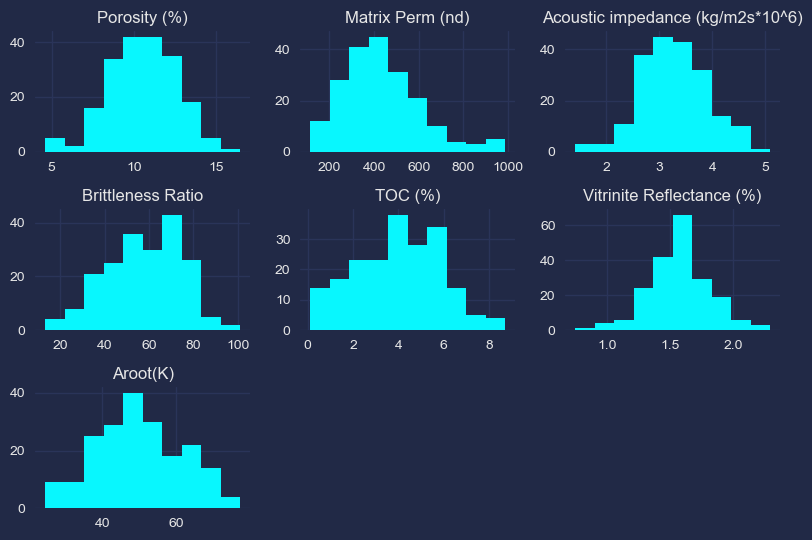

In [9]:
# show the freature distriutions
plt.figure(figsize=(15,10))
df.hist();
plt.tight_layout();

<AxesSubplot:>

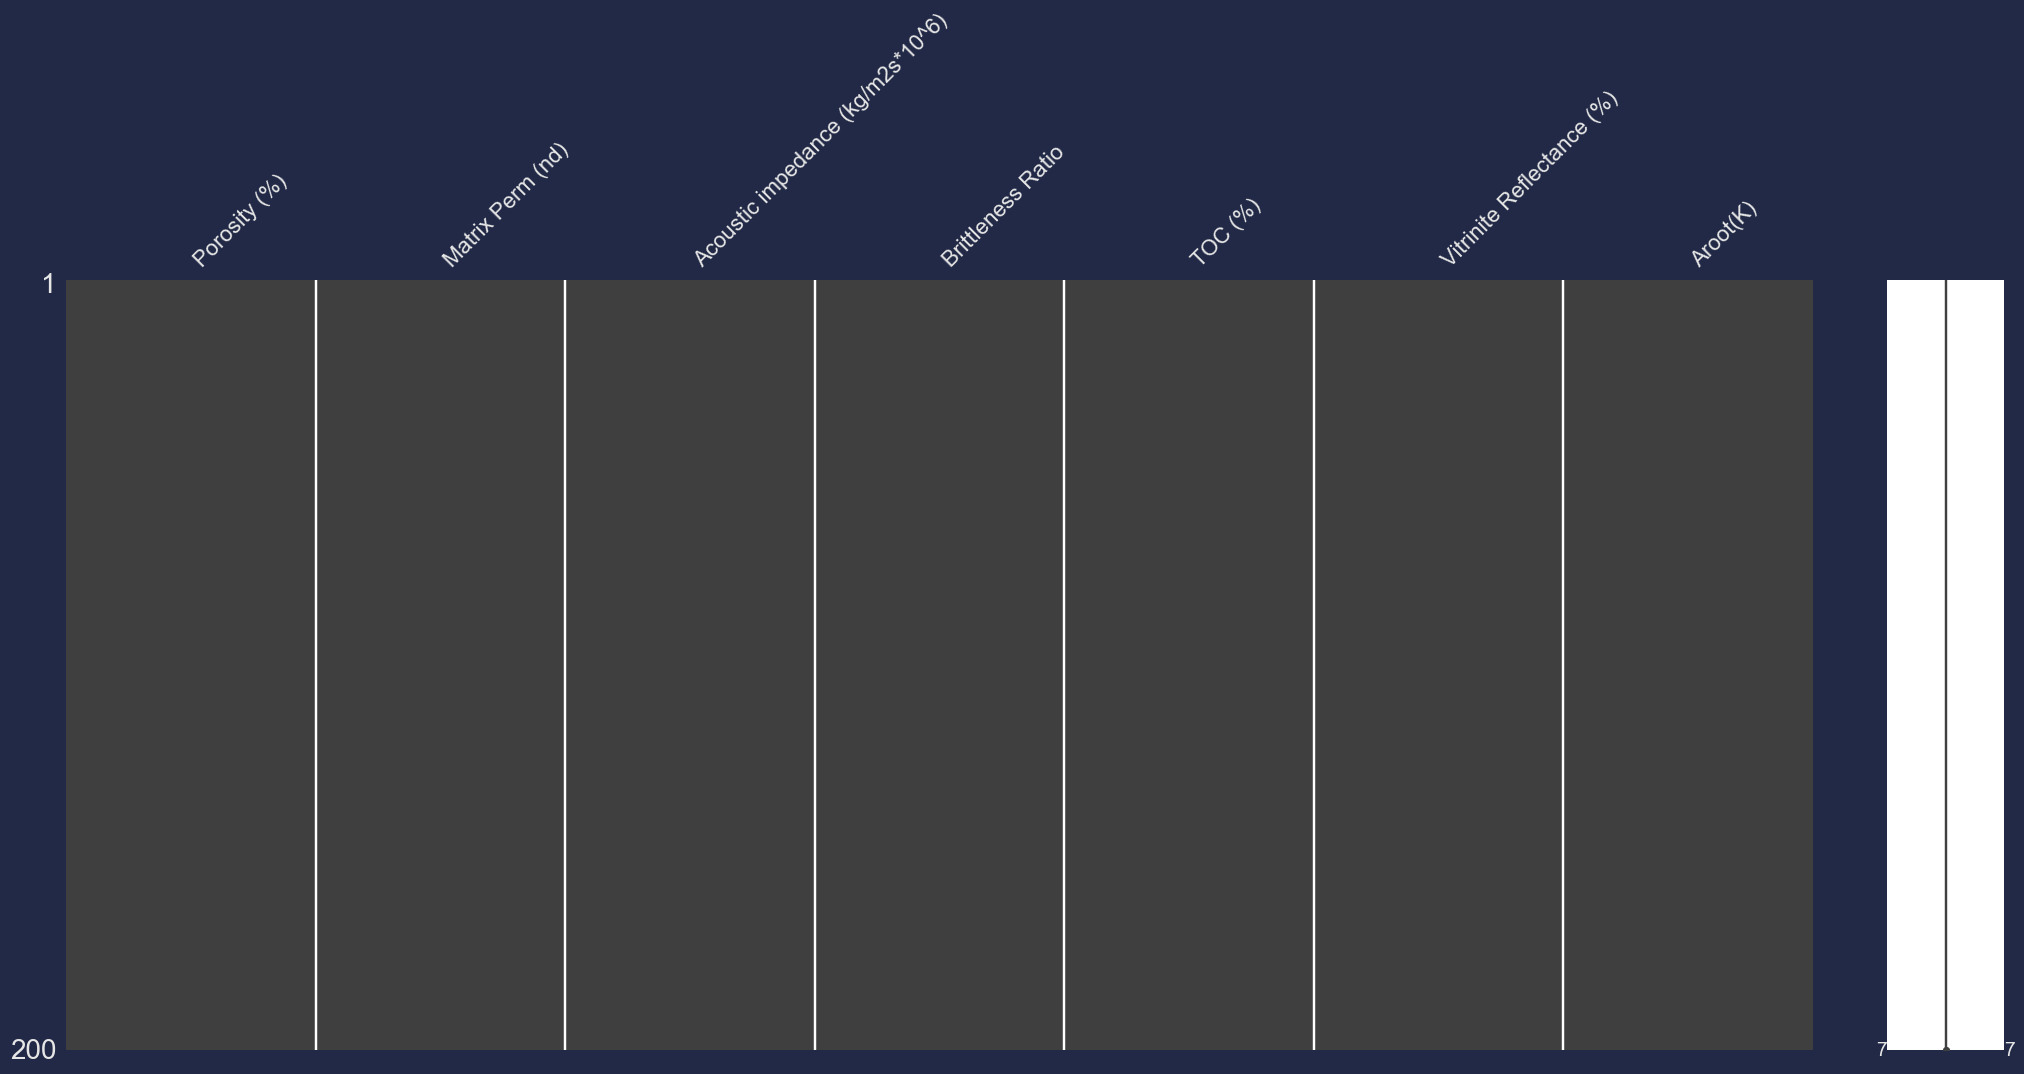

In [10]:
# have a look at missing data
ms.matrix(df)

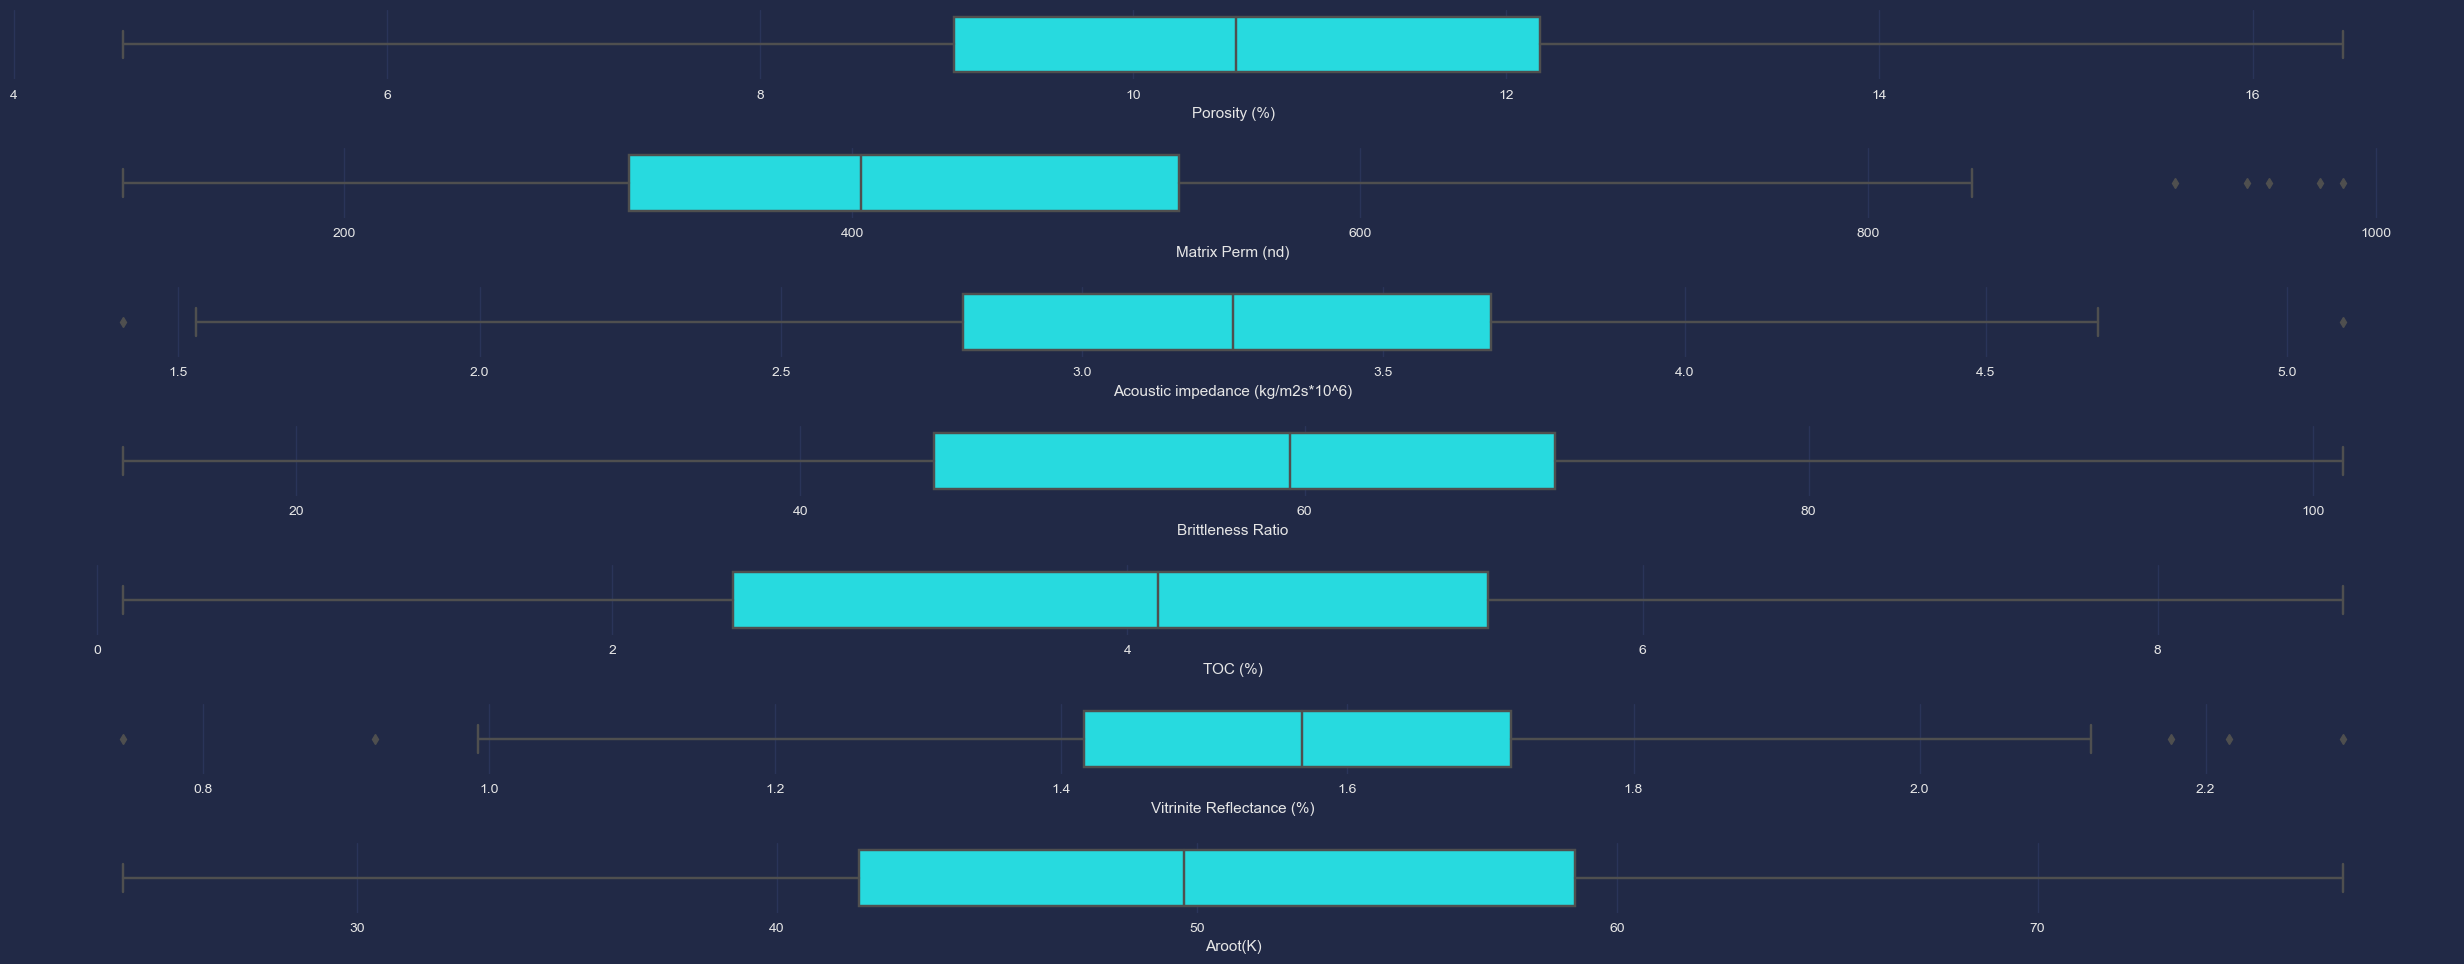

In [16]:
#
plt.figure(figsize=(25,10))
for i,col in enumerate(df.columns):
    plt.subplot(len(df.columns),1,i+1)
    sns.boxplot(df[col])
    
plt.tight_layout(pad=2)

#### Show linear relationship between variables

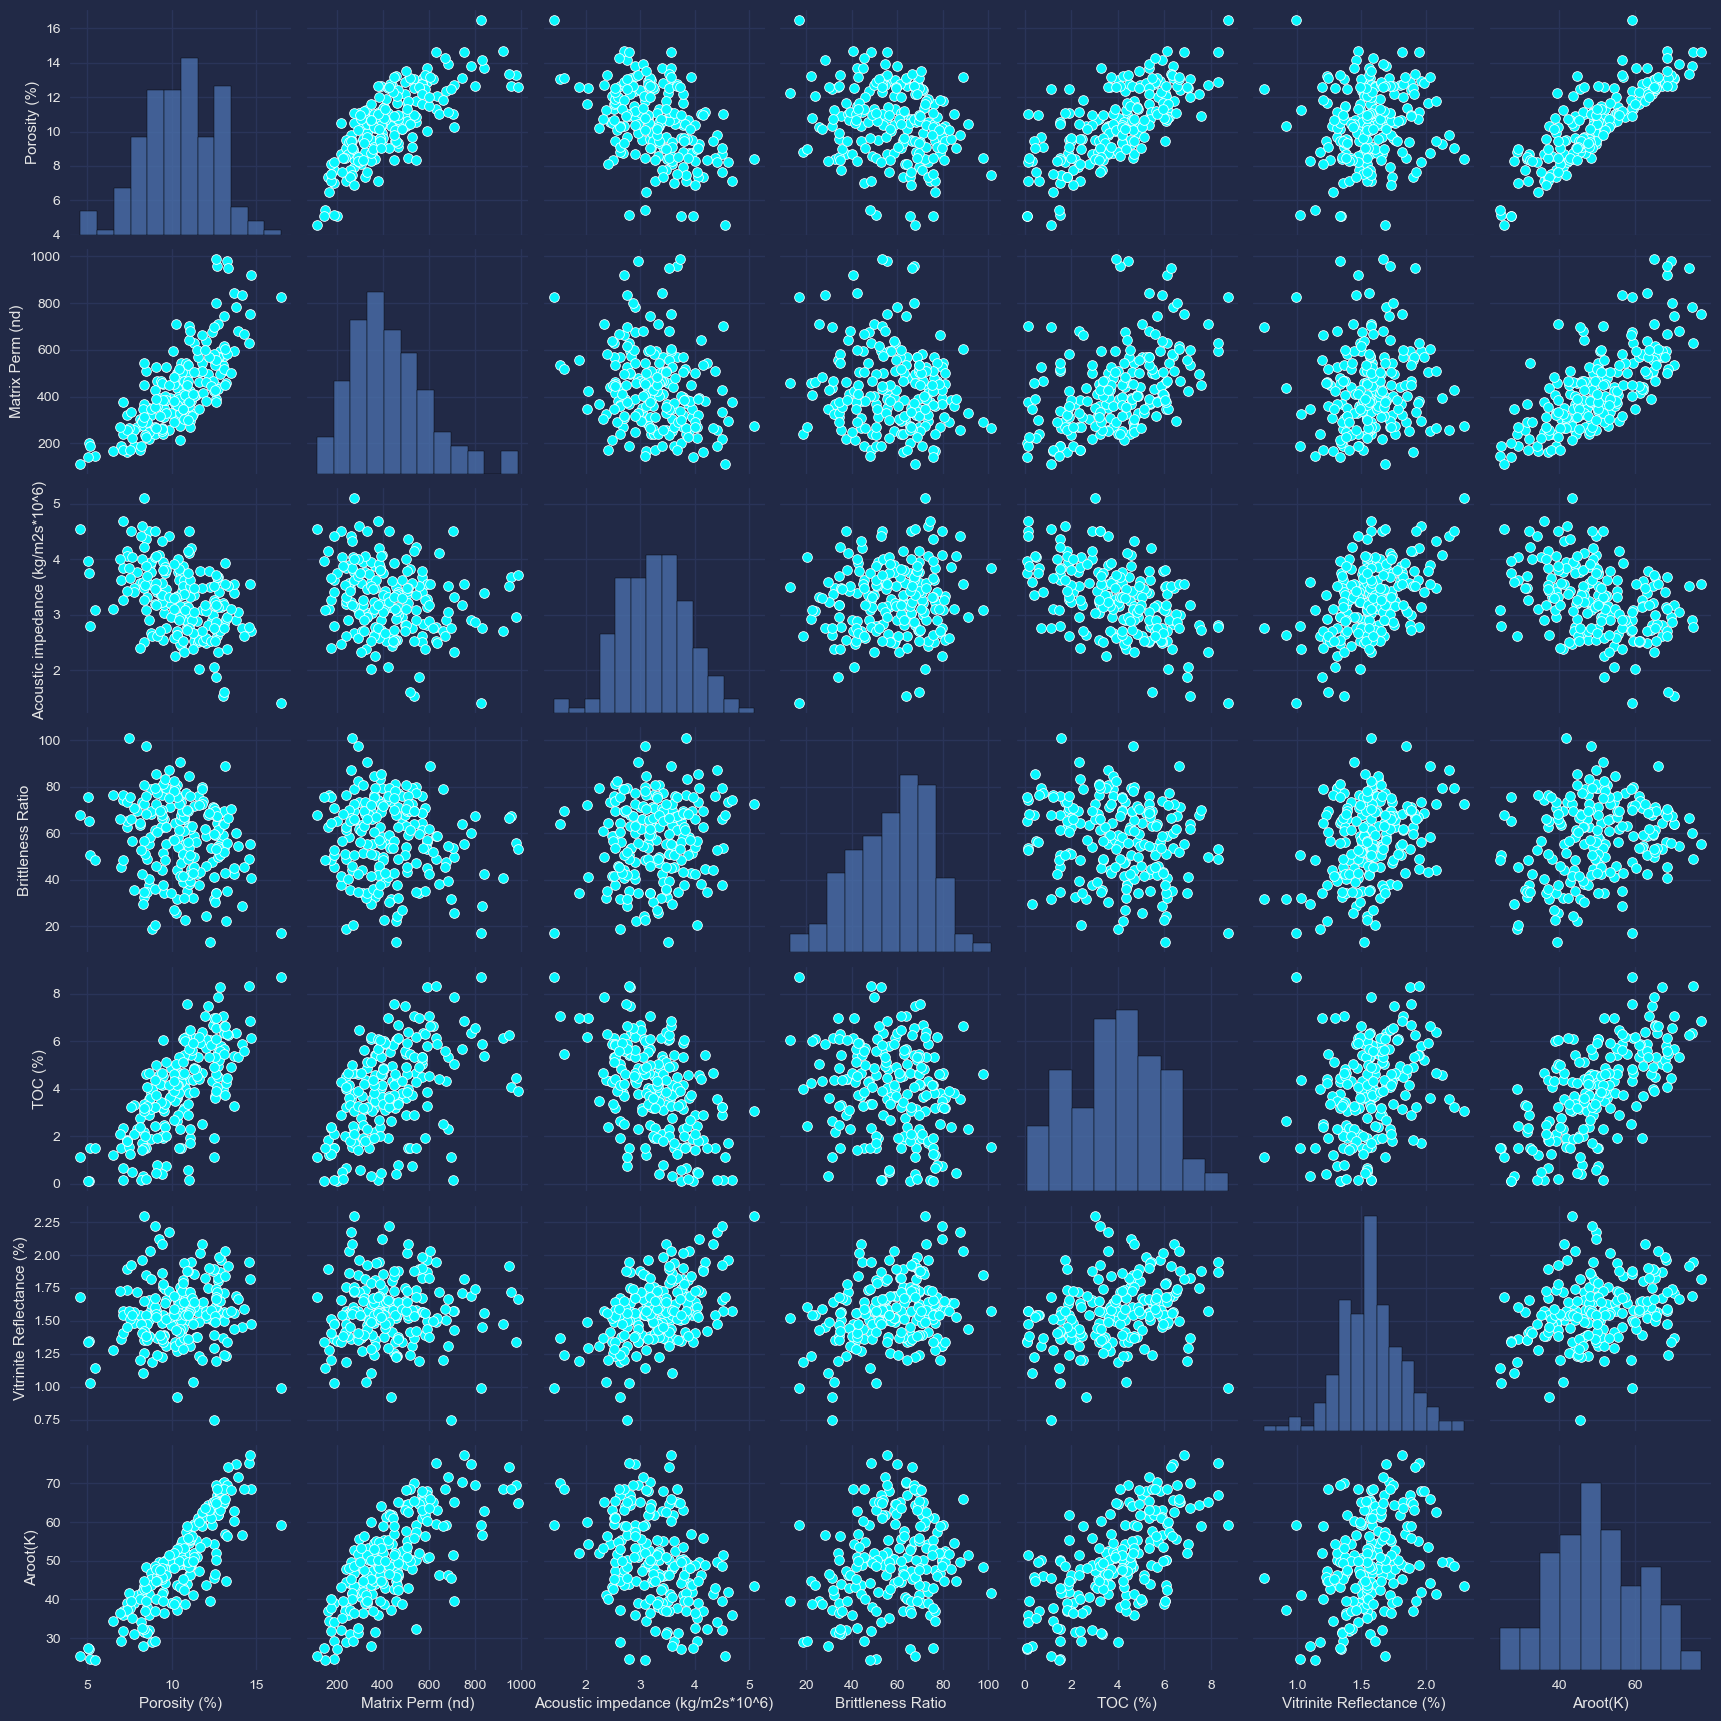

In [17]:
# show all the variables
sns.pairplot(df)

In [18]:
# show coeffcient of colinearity
df.corr()

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
Porosity (%),1.000000,0.760546,-0.461549,-0.218570,0.710718,0.111860,0.861910
Matrix Perm (nd),0.760546,1.000000,-0.239636,-0.124017,0.472598,0.051023,0.727426
Acoustic impedance (kg/m2s*10^6),-0.461549,-0.239636,1.000000,0.127599,-0.529581,0.499143,-0.390835
Brittleness Ratio,-0.218570,-0.124017,0.127599,1.000000,-0.212520,0.317929,0.237155
TOC (%),0.710718,0.472598,-0.529581,-0.212520,1.000000,0.300523,0.654632
Vitrinite Reflectance (%),0.111860,0.051023,0.499143,0.317929,0.300523,1.000000,0.323182
Aroot(K),0.861910,0.727426,-0.390835,0.237155,0.654632,0.323182,1.000000


<AxesSubplot:>

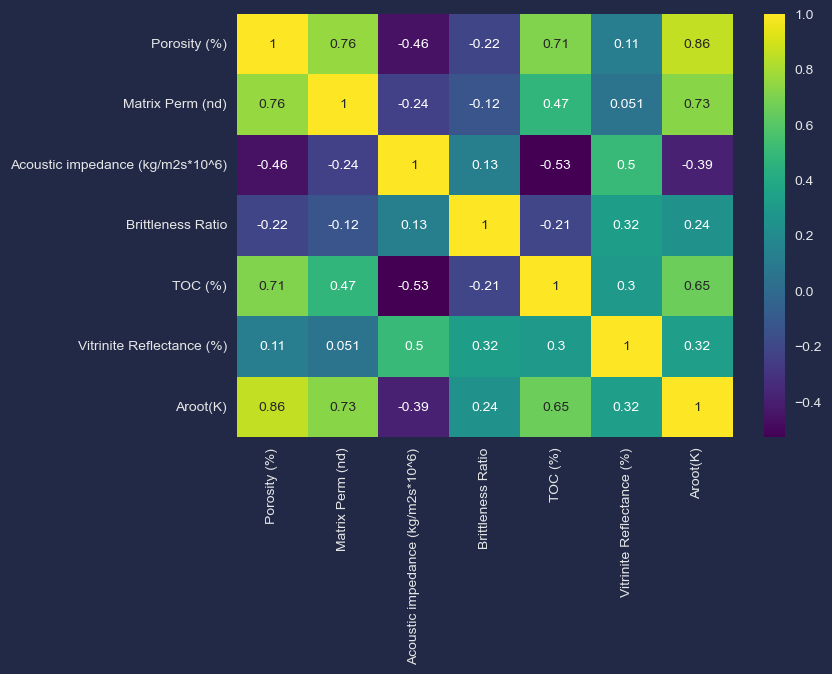

In [20]:
# remove colinear features
sns.heatmap(df.corr() , annot=True, cmap="viridis")

In [21]:
df.drop(columns=["Matrix Perm (nd)","TOC (%)"] , inplace=True)

In [22]:
df

,Porosity (%),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,Vitrinite Reflectance (%),Aroot(K)
0,8.456,3.080,97.680,1.848,48.306469
1,8.666,3.542,55.404,1.504,41.300912
2,9.814,4.411,87.360,2.176,49.688356
3,12.369,2.893,47.772,1.504,59.132694
4,12.264,3.498,13.128,1.520,39.503121
...,...,...,...,...,...
195,8.365,3.267,80.616,1.648,44.622765
196,12.593,3.718,53.184,1.664,64.961047
197,8.484,3.872,68.484,1.384,39.543047
198,10.885,2.728,69.900,1.880,59.004091


# Modeling Step:

## Scaling the data 

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scalar = MinMaxScaler()
# fitting 
scalar.fit(df)
df_scaled = scalar.transform(df)
df_scaled = pd.DataFrame(df_scaled,columns = df.columns)
df_scaled

,Porosity (%),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,Vitrinite Reflectance (%),Aroot(K)
0,0.325294,0.453731,0.960076,0.711340,0.451776
1,0.342941,0.579104,0.480038,0.489691,0.319177
2,0.439412,0.814925,0.842894,0.922680,0.477932
3,0.654118,0.402985,0.393378,0.489691,0.656690
4,0.645294,0.567164,0.000000,0.500000,0.285149
...,...,...,...,...,...
195,0.317647,0.504478,0.766317,0.582474,0.382052
196,0.672941,0.626866,0.454830,0.592784,0.767007
197,0.327647,0.668657,0.628560,0.412371,0.285905
198,0.529412,0.358209,0.644638,0.731959,0.654256


## Spliting the data 

In [23]:
# import train test split
from sklearn.model_selection import train_test_split

In [40]:
# splitting the data
X = df_scaled.drop(columns=["Aroot(K)"])
y= df_scaled["Aroot(K)"]


In [41]:
X_train, X_test , y_train, y_test = train_test_split( X , y, test_size=.2)

In [42]:
# show the length of each
len(X_train) , len(X_test)

(160, 40)

## Build the model

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
# import linearregression model
lr = LinearRegression()
# fitting 
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
# predict the x_test
y_pred = lr.predict(X_test)

In [46]:
# have a look at the parameters
pd.Series(lr.coef_,index=X.columns).to_frame()


,0
Porosity (%),1.082167
Acoustic impedance (kg/m2s*10^6),-0.155837
Brittleness Ratio,0.426838
Vitrinite Reflectance (%),0.247236


## Evaluate the model

In [50]:
# import the meterics
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [51]:
# show the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f" MAE = {mae} , MSE= {mse}")


 MAE = 0.03410409194959611 , MSE= 0.0022646702226694847


<AxesSubplot:xlabel='Aroot(K)'>

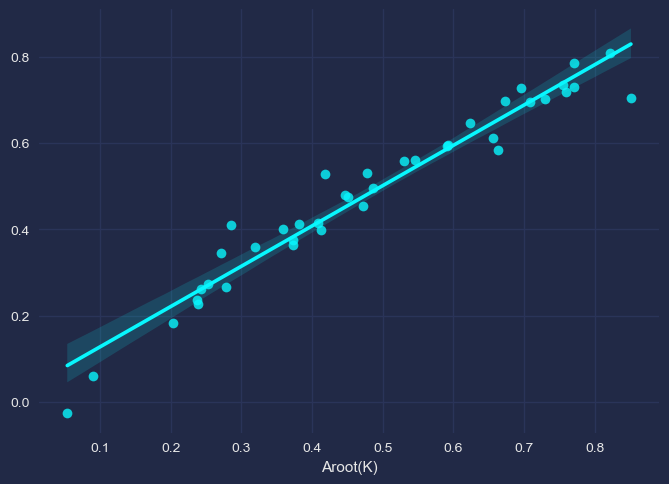

In [54]:
sns.regplot(y_test,y_pred)